# Assistant bot with OpenAI's Swarm
This example shows a customer service bot that has two parts: one for interacting with users and another for providing help. It includes tools to assist in these tasks. The run_demo_loop function helps us create an interactive demo session.

## Overview
The support bot has two main parts:

1. **User Interface Agent**: This part interacts with users at first and directs them to the help center based on what they need.
2. **Help Center Agent**: This part offers detailed help and support using various tools and is connected to a LanceDB VectorDB to retrieve documents.

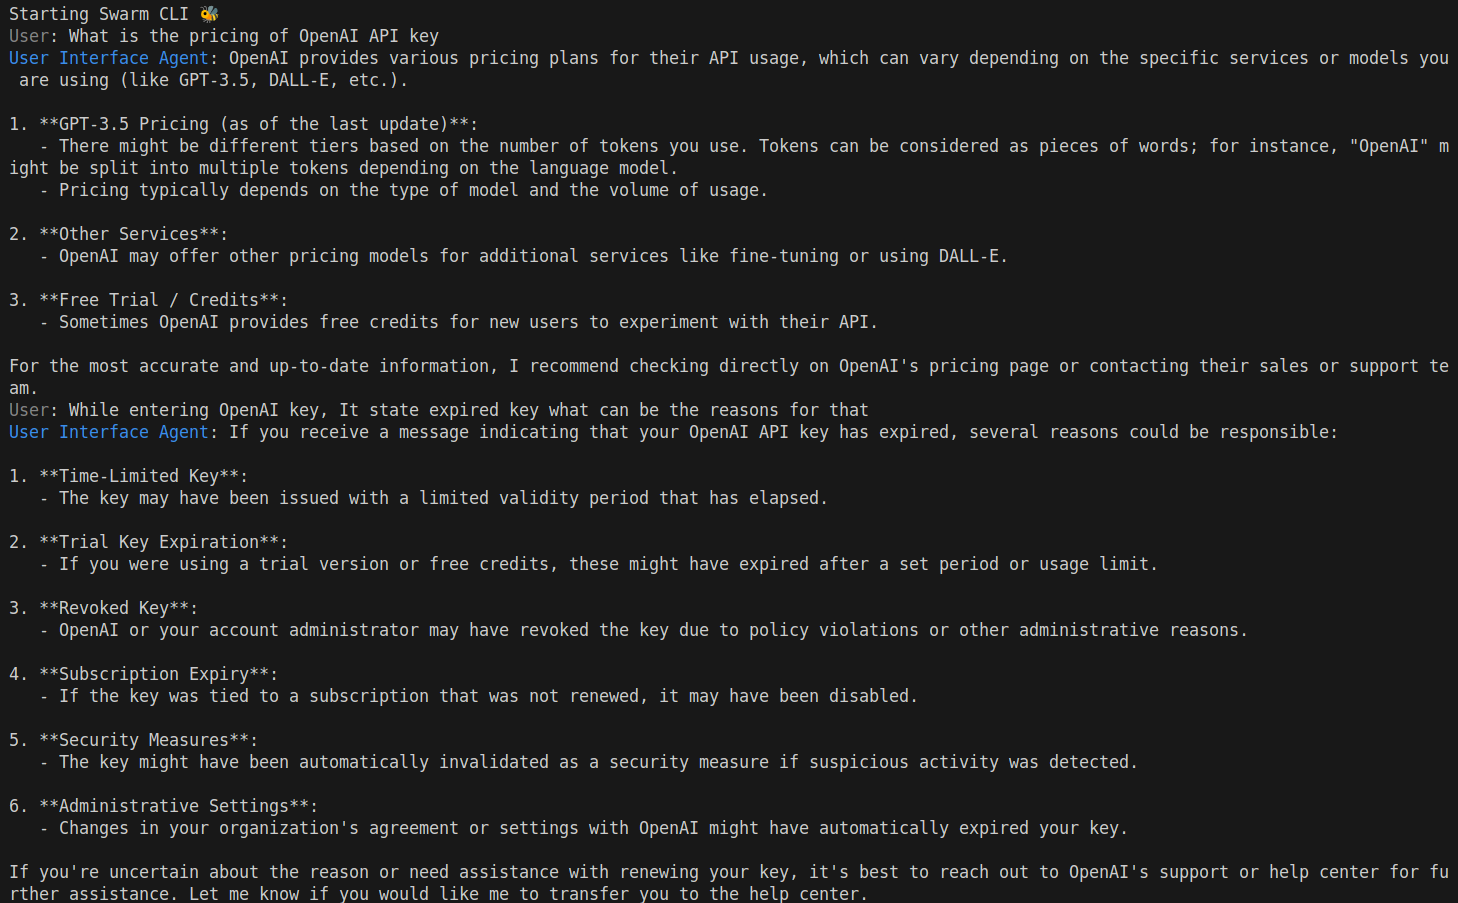

## Install requirements

In [1]:
!pip install lancedb openai datasets -q
!pip install git+https://github.com/openai/swarm.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
  Cloning https://github.com/openai/swarm.git to /tmp/pip-req-build-y08wdobn
  Running command git clone --filter=blob:none --quiet https://github.com/openai/swarm.git 

## set OPENAI Key as Env variable

In [2]:
import os

os.environ["OPENAI_API_KEY"] = "sk-proj-....."

## Prepare and Ingest dataset

In [3]:
import pandas as pd
import lancedb
from lancedb.pydantic import LanceModel, Vector
from lancedb.embeddings import get_registry

from datasets import load_dataset

EMBEDDING_MODEL = "text-embedding-ada-002"

# load dataset
dataset_name = "Prasant/openai-dataset"
dataset = load_dataset(dataset_name)
article_df = pd.DataFrame(dataset["train"])

# ingest data inside table
db = lancedb.connect("/tmp/db")
func = get_registry().get("openai").create(name=EMBEDDING_MODEL)


class Article(LanceModel):
    text: str = func.SourceField()
    vector: Vector(func.ndims()) = func.VectorField()
    title: str
    url: str


table = db.create_table("help-center", schema=Article, mode="overwrite")

table.add(article_df)

print(len(table))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/76 [00:00<?, ?it/s]

article_6338765.json:   0%|          | 0.00/823 [00:00<?, ?B/s]

article_6378378.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

article_6283125.json:   0%|          | 0.00/2.97k [00:00<?, ?B/s]

article_6272952.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

article_6485334.json:   0%|          | 0.00/3.27k [00:00<?, ?B/s]

article_6402865.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

article_6399305.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

article_6431339.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

article_6378407.json:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

article_6431922.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

article_6233728.json:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

article_6425277.json:   0%|          | 0.00/509 [00:00<?, ?B/s]

article_6338764.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

article_6272941.json:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

article_6503842.json:   0%|          | 0.00/835 [00:00<?, ?B/s]

article_6468065.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

article_6582257.json:   0%|          | 0.00/891 [00:00<?, ?B/s]

article_6516417.json:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

article_6582391.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

article_6614161.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

article_6584194.json:   0%|          | 0.00/673 [00:00<?, ?B/s]

article_6613629.json:   0%|          | 0.00/2.36k [00:00<?, ?B/s]

article_6613520.json:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

article_6613605.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

article_6584249.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

article_6639781.json:   0%|          | 0.00/896 [00:00<?, ?B/s]

article_6614457.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

article_6613657.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

article_6614209.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

article_6640792.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

article_6643036.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

article_6643435.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

article_6643167.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

article_6643004.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

article_6641048.json:   0%|          | 0.00/987 [00:00<?, ?B/s]

article_6696591.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

article_6653653.json:   0%|          | 0.00/686 [00:00<?, ?B/s]

article_6705023.json:   0%|          | 0.00/4.15k [00:00<?, ?B/s]

article_6640875.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

article_6684216.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

article_6654303.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

article_6654000.json:   0%|          | 0.00/9.21k [00:00<?, ?B/s]

article_6643200.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

article_6640864.json:   0%|          | 0.00/990 [00:00<?, ?B/s]

article_6681258.json:   0%|          | 0.00/3.58k [00:00<?, ?B/s]

article_6781152.json:   0%|          | 0.00/866 [00:00<?, ?B/s]

article_6783457.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

article_6811186.json:   0%|          | 0.00/4.66k [00:00<?, ?B/s]

article_6824809.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

article_6781222.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

article_6843909.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

article_6882433.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

article_6781228.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

article_6891781.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

article_6837156.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

article_6742369.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

article_6891767.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

article_6843914.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

article_6891753.json:   0%|          | 0.00/2.25k [00:00<?, ?B/s]

article_6891827.json:   0%|          | 0.00/917 [00:00<?, ?B/s]

article_6825453.json:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

article_6891829.json:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

article_6891831.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

article_6897198.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

article_6897204.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

article_6897202.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

article_6901266.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

article_6891834.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

article_6897191.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

article_6950777.json:   0%|          | 0.00/4.08k [00:00<?, ?B/s]

article_6897186.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

article_6897199.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

article_6897179.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

article_6897194.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

article_6891839.json:   0%|          | 0.00/2.75k [00:00<?, ?B/s]

article_6897213.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/76 [00:00<?, ? examples/s]

76


## Swarm Agents Implementation

In [ ]:
import re

import lancedb
from swarm import Agent
from swarm.repl import run_demo_loop

db = lancedb.connect("/tmp/db")
table = db.open_table("help-center")


def query_lancedb(query, top_k=5):
    # Creates embedding vector from user query
    query_results = table.search(query).limit(top_k).to_pandas()

    return query_results


def query_docs(query):
    """Query the knowledge base for relevant articles."""
    print(f"Searching knowledge base with query: {query}")

    query_results = query_lancedb(query)
    output = []

    print(query_results)
    for index, article in query_results.iterrows():
        output.append((article["title"], article["text"], article["url"]))

    if output:
        title, content, _ = output[0]
        response = f"Title: {title}\nContent: {content}"
        truncated_content = re.sub(
            r"\s+", " ", content[:50] + "..." if len(content) > 50 else content
        )
        print("Most relevant article title:", truncated_content)
        return {"response": response}
    else:
        print("No results")
        return {"response": "No results found."}


def send_email(email_address, message):
    """Send an email to the user."""
    response = f"Email sent to: {email_address} with message: {message}"
    return {"response": response}


def submit_ticket(description):
    """Submit a ticket for the user."""
    return {"response": f"Ticket created for {description}"}


def transfer_to_help_center():
    """Transfer the user to the help center agent."""
    return help_center_agent


user_interface_agent = Agent(
    name="User Interface Agent",
    instructions="You are a user interface agent that handles all interactions with the user. Call this agent for general questions and when no other agent is correct for the user query.",
    functions=[transfer_to_help_center],
)

help_center_agent = Agent(
    name="Help Center Agent",
    instructions="You are an OpenAI help center agent who deals with questions about OpenAI products, such as GPT models, DALL-E, Whisper, etc.",
    functions=[query_docs, submit_ticket, send_email],
)

if __name__ == "__main__":
    run_demo_loop(user_interface_agent)

Starting Swarm CLI 🐝
User: What is the pricing of OpenAI API key?
User Interface Agent: OpenAI API pricing varies based on the specific API product and usage. Here are some general details:

1. **GPT-3.5 and GPT-4 API:**
   - These models are typically priced based on the number of tokens (words or word parts) processed in requests to the API.
   - The pricing might differ between tokens used in input and output.
   - Specific prices can be found on OpenAI's official pricing page or by contacting their sales team.

2. **Fine-Tuning:**
   - The costs for training custom models may involve additional fees, and variable pricing based on the model and data used for fine-tuning.

3. **Other Services:**
   - Other AI models and services provided by OpenAI might have different pricing structures.

Pricing can also depend on the level of access purchased (e.g., pay-as-you-go vs. committed use) and any relevant discounts for high volume usage or non-profit/educational purposes.

For exact, up-t